# Rede Perceptron

## Imports necessários

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Base de Dados

### Importação da base

In [2]:
arquivo = "Banco de dados para a RNA Perceptron.csv"
dataframe = pd.read_csv(arquivo)

print(dataframe.head())  # Exibe as primeiras linhas do DataFrame
lista = dataframe.values.tolist()

   X0 (Bias)  X1 (Pressão)  X2 (Temperatura)  Y (Saída)
0       -1.0     -0.215326         -0.288510        0.0
1       -1.0     -0.263642         -0.673541        0.0
2       -1.0     -0.843519          0.215869        0.0
3       -1.0     -0.934878          0.551532        0.0
4       -1.0     -0.017532          0.244474        0.0


### Preparação da base

1.   Embaralhamento do conjunto de dados.
2.   Separação em dois conjuntos: Treinamento e Teste, de acordo com o usuário.
3.   Transformar listas em matrizes utilizando NumPy.
4.   Separar as entradas dos valores de saídas.

In [72]:
## Porcentagem de divisão do conjunto de dados
porcentagem = int(input("Informe a porcentagem de dados a serem utilizados no treinamento da rede: "))
while porcentagem < 10 or porcentagem > 90:
  print("Valor inválido. Escolha entre 10% a 90% para ser utilizado no treinamento.")
  porcentagem = int(input("Informe novamente uma porcentagem: "))
print("Ecolhido ultilizar ", porcentagem, "% dos dados como treinamento.")
print("Para testes serão ultilizado ", 100 - porcentagem, "% dos dados.")

Informe a porcentagem de dados a serem utilizados no treinamento da rede: 66
Ecolhido ultilizar  66 % dos dados como treinamento.
Para testes serão ultilizado  34 % dos dados.


In [73]:
# 1 :: Embaralhamento do conjunto de dados
random.shuffle(lista)

# 2 :: Separação em dois conjuntos: Treinamento e Teste
tamanho_treinamento = int(len(lista) * (porcentagem / 100))
lista_treinamento = lista[0:tamanho_treinamento]
lista_teste = lista[tamanho_treinamento:len(lista)]

# 3 :: Transformar listas em matrizes utilizando NumPy
matriz_treinamento = np.array(lista_treinamento)
matriz_teste = np.array(lista_teste)

# 4 :: Separar as entradas dos valores de saídas
# Entradas
matriz_treinamento_entradas = matriz_treinamento[:, :-1]
matriz_treinamento_saidas = matriz_treinamento[:,-1:]

# Saídas
matriz_teste_entradas = matriz_teste[:, :-1]
matriz_teste_saidas = matriz_teste[:,-1:]

## Neurônio Artificial

1.   Definir um valor inicial aleatório para os pesos de cada entrada e do *bias*.
2.   Definir um valor inicial para a **Taxa de Aprendizagem**.
3.   Definir o **Aprendizado de Hibb**, ou seja como a rede irá tratar os erros do treinamento.
4.   Definir o **Neurônio Artificial**, seu funcionamento e sua **Função de Ativação**.

In [81]:
pesos_animacao = [] # Usada como histórico dos pesos


# 1 :: Definir pesos aleatórios
vetor_pesos = np.random.rand(3)
vetor_pesos = vetor_pesos.reshape(-1,1)

# 2 :: Definir taxa de aprendizagem
taxa_aprendizado = float(input("Informe a taxa de aprendizado: "))

Informe a taxa de aprendizado: 0.7985


In [82]:
# 3 :: Definição do Aprendizado de Hibb
def aprendizado_hibb(entrada, diferenca):
  global vetor_pesos
  global pesos_animacao
  aprendizado = taxa_aprendizado * diferenca
  novos_pesos = vetor_pesos + aprendizado * entrada.reshape(-1,1)
  return novos_pesos

In [83]:
# 4 :: Definição do Neurônio Artificial
def neuronio_perceptron(entradas, saida_esperada):
  global vetor_pesos

  u = np.dot(entradas, vetor_pesos)
  y = 0 if u <= 0 else 1
  vetor_pesos = aprendizado_hibb(entrada, (saida_esperada - y))

  if y == saida_esperada:
    return True
  else:
    return False

In [84]:
# 4 :: Definição do Neurônio Artificial
def neuronio_perceptron_teste(entradas):
  global vetor_pesos
  u = np.dot(entradas, vetor_pesos)
  return 0 if u <= 0 else 1

## Antes do treinamento

Abaixo será criado um gráfico com todos as entradas do conjunto de dados, plotando as saídas 0 (desligado) como **o** e 1 (ligado) como **x**.

Por fim é traçada a reta a partir dos valores de pesos inicialmente aleatórios.

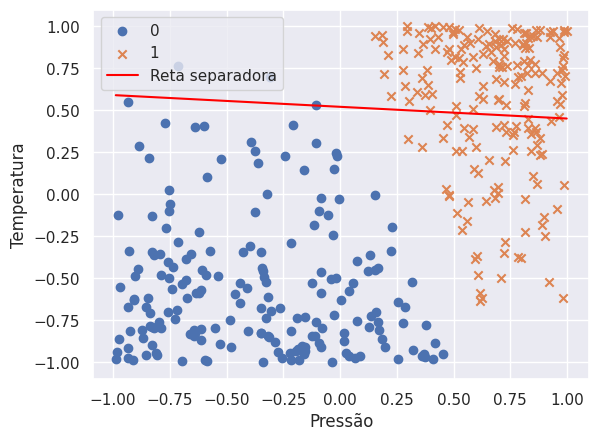

In [85]:
# Obter todo conjunto de dados como matriz
matriz_conjunto = np.array(lista)

# Extrair as entradas da matriz
x_1 = matriz_conjunto[:, 1]  # Pressão
x_2 = matriz_conjunto[:, 2]  # Temperatura

# Filtrar os pontos com valor 0 e 1
x_zero = x_1[matriz_conjunto[:, 3] == 0]
y_zero = x_2[matriz_conjunto[:, 3] == 0]

x_um = x_1[matriz_conjunto[:, 3] == 1]
y_um = x_2[matriz_conjunto[:, 3] == 1]

# Plotar os pontos
plt.scatter(x_zero, y_zero, marker='o', label='0')
plt.scatter(x_um, y_um, marker='x', label='1')

# Calcular os coeficientes da reta
a = -vetor_pesos[1] / vetor_pesos[2]
b = vetor_pesos[0] / vetor_pesos[2]

# Definir os pontos para a reta
x_values = np.linspace(min(x_1), max(x_1), 100)
y_values = a * x_values + b

# Plotar a reta
plt.plot(x_values, y_values, color='red', linestyle='-', label='Reta separadora')

plt.xlabel('Pressão')
plt.ylabel('Temperatura')

plt.legend()
plt.grid(True)
plt.show()

## Treinamento

O treinamento é feito em épocas, que são definidas como ...


In [86]:
# Treinamento

# X :: Cronometro de treinamento
inicio_treinamento = time.process_time()
epoca = 0
quantidade_erros = 1

while quantidade_erros > 0:
  quantidade_erros = 0
  epoca = epoca + 1
  for index, entrada in enumerate(matriz_treinamento_entradas):
    ok = neuronio_perceptron(entrada, matriz_treinamento_saidas[index])
    if not ok:
      quantidade_erros = quantidade_erros + 1

# X :: Finalizando cronometro de treinamento
fim_treinamento = time.process_time()
print("Tempo de treinamento: ", fim_treinamento - inicio_treinamento, " segundos.")
print("Epocas: ", epoca)

Tempo de treinamento:  0.01998559399999067  segundos.
Epocas:  2


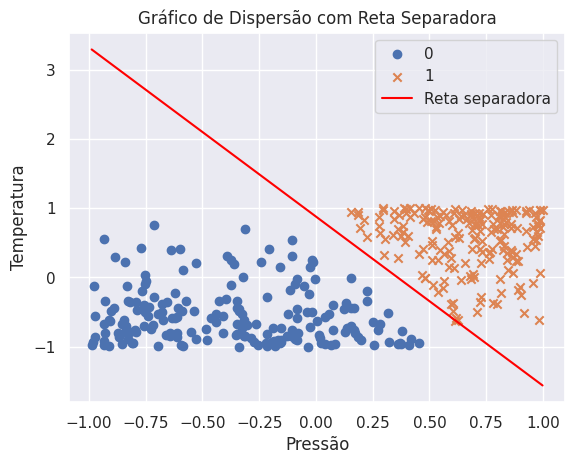

In [87]:
# Obter todo conjunto de dados como matriz
matriz_conjunto = np.array(lista)

# Extrair as entradas da matriz
x_1 = matriz_conjunto[:, 1]  # Pressão
x_2 = matriz_conjunto[:, 2]  # Temperatura

# Filtrar os pontos com valor 0 e 1
x_zero = x_1[matriz_conjunto[:, 3] == 0]
y_zero = x_2[matriz_conjunto[:, 3] == 0]

x_um = x_1[matriz_conjunto[:, 3] == 1]
y_um = x_2[matriz_conjunto[:, 3] == 1]

# Plotar os pontos
plt.scatter(x_zero, y_zero, marker='o', label='0')
plt.scatter(x_um, y_um, marker='x', label='1')

# Calcular os coeficientes da reta
a = -vetor_pesos[1] / vetor_pesos[2]
b = vetor_pesos[0] / vetor_pesos[2]

# Definir os pontos para a reta
x_values = np.linspace(min(x_1), max(x_1), 100)
y_values = a * x_values + b

# Plotar a reta
plt.plot(x_values, y_values, color='red', linestyle='-', label='Reta separadora')

plt.xlabel('Pressão')
plt.ylabel('Temperatura')
plt.title('Gráfico de Dispersão com Reta Separadora')

plt.legend()
plt.grid(True)
plt.show()

## Teste da rede

Para testar a rede será ultilizado um segundo conjunto de dados que não passaram por treinamento.

A informação coletada será apenas da saída do neurônio, para comparar com as saídas esperadas, obtendo assim uma matriz de confunção que irá apresentar os resultados obtidos.

Para cada teste será também calculado o tempo de processamento, e apresentado um quadro comparativo.


In [30]:
tempos_teste = []
saidas_teste = []

for index, entrada in enumerate(matriz_teste_entradas):
  inicio_teste = time.process_time()
  saidas_teste.append(neuronio_perceptron_teste(entrada))
  fim_teste = time.process_time()
  tempos_teste.append(fim_teste - inicio_teste)

### Matriz de confusão

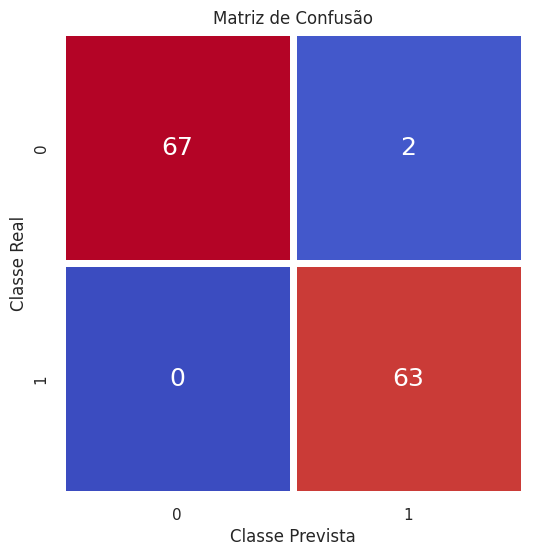

              precisão    revocação  pontuação F1   suporte

         0.0       1.00      0.97      0.99        69
         1.0       0.97      1.00      0.98        63

    acurácia                           0.98       132


In [70]:
# Matriz de confusão
cf_matrix = confusion_matrix(matriz_teste_saidas, saidas_teste)
cf_matrix

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='d', linewidth=5, cbar=False, square=True, annot_kws={"size": 18})
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Metricas do teste
relatorio = classification_report(matriz_teste_saidas, saidas_teste)

# Traduzindo as métricas
relatorio = relatorio.replace('precision', 'precisão')
relatorio = relatorio.replace('recall', 'revocação')
relatorio = relatorio.replace('f1-score', 'pontuação F1')
relatorio = relatorio.replace('support', 'suporte')
relatorio = relatorio.replace('accuracy', 'acurácia')
linhas = relatorio.split('\n')[:6]
relatorio = '\n'.join(linhas)
print(relatorio)

### Tempos de Execução

Apresentação de um resumo estatístico de todos os tempo de execução, para todo o conjunto de dados de teste.


In [43]:
tempos_teste = np.array(tempos_teste) * 1000

df = pd.DataFrame({'Tempo de Execução (milisegundos)': tempos_teste})
print("Tabela Resumo dos Tempos de Execução:")

resumo = df.describe()
resumo.index = ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
print(resumo)

Tabela Resumo dos Tempos de Execução:
               Tempo de Execução (milisegundos)
Contagem                             132.000000
Média                                 18.532773
Desvio Padrão                        126.991355
Mínimo                                 6.095000
25%                                    6.517750
50%                                    6.735500
75%                                    7.030750
Máximo                              1466.081000


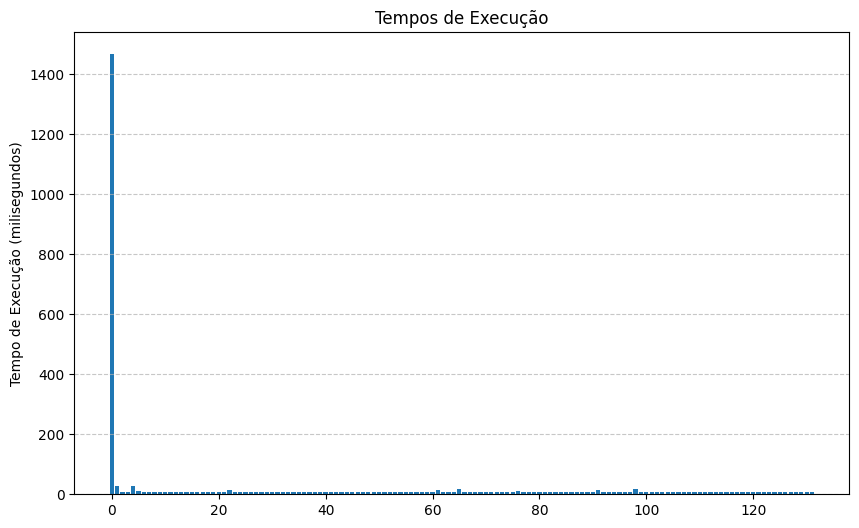

In [45]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(tempos_teste)), tempos_teste)
plt.ylabel('Tempo de Execução (milisegundos)')
plt.title('Tempos de Execução')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()